# Diwali Sales Analysis

# The Diwali festival season presents a valuable opportunity for businesses to boost their sales through festive discounts and targeted marketing. This project performs Exploratory Data Analysis (EDA) on a Diwali sales dataset to uncover customer behavior, purchasing patterns, and factors driving sales. The goal is to derive meaningful insights that can inform business strategies and improve profitability during the festive season.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
# droping the unrelated/blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
# checking the null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
# droping the null values

df.dropna(inplace=True)

In [13]:
df.shape

(11239, 13)

In [14]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
# change the data type of amount

df['Amount']=df['Amount'].astype('int')

In [16]:
df['Amount'].dtypes

dtype('int32')

# Sales by Gender

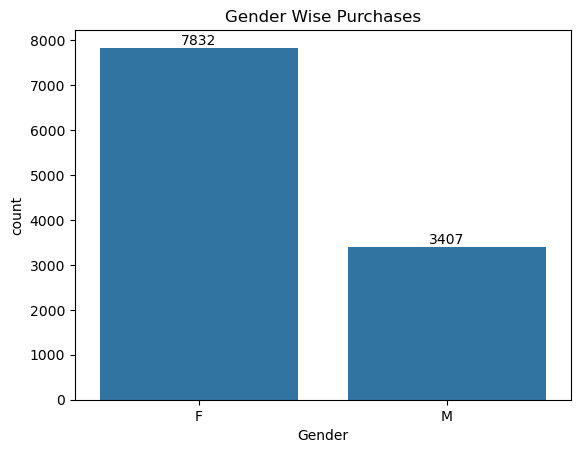

In [36]:
ax=sns.countplot(x='Gender',data=df)
plt.title('Gender Wise Purchases')

for bars in ax.containers:
    ax.bar_label(bars)

# Revenue by Gender

Text(0.5, 1.0, 'Gender wise Revenue')

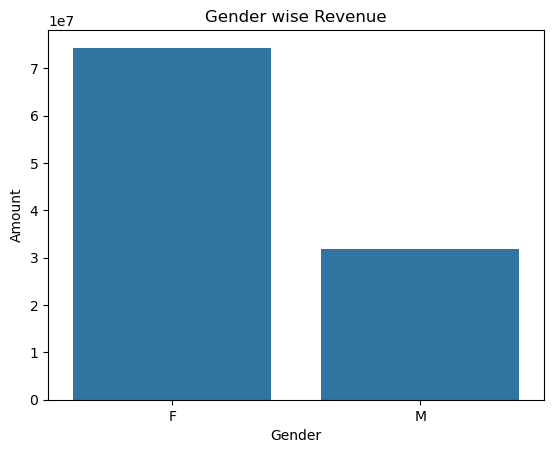

In [33]:
sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
ax=sns.barplot(x='Gender',y='Amount',data=sales_gen)
plt.title('Gender wise Revenue')




# From the above two graphs we can observe that most of the buyers are females and even the purchasing power of females are greater as compared to males

# Age group Analysis

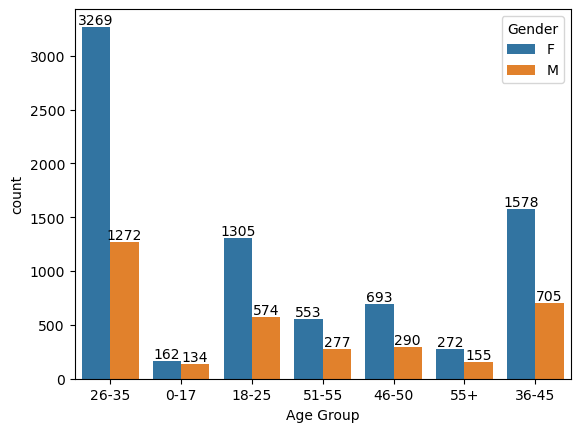

In [38]:


ax= sns.countplot(x='Age Group' , hue='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)
    

# from the above graph it can be observed that the buyers from age group 26-35 are high and the count of females is more lowest buyesrs are from age grp 55+ 

# Age wise revenue generated

Text(0.5, 1.0, 'Age Group wise Revenue')

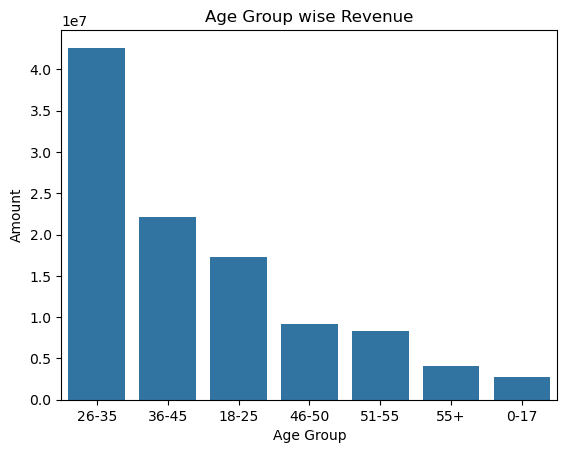

In [42]:


sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)
plt.title('Age Group wise Revenue')

# from the  above graph it can be observed that the most of the revenue is generated from the age group 26-35

# Top 10 States by highest Orders

Text(0.5, 1.0, 'Top 10 States with highest orders')

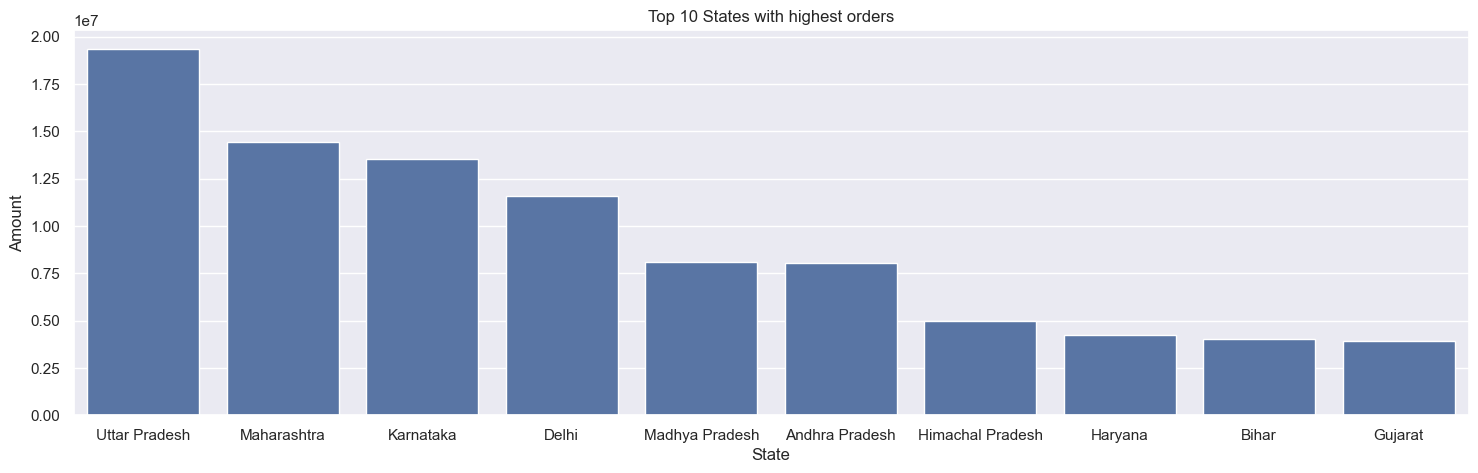

In [55]:
sales_states=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
ax=sns.barplot(x='State',y='Amount',data=sales_states)
plt.title('Top 10 States with highest orders')


# from the above graph it can be observed that more revenue is generated from uttar pradesh and the lowest revenue is generated by gujarat and bihar

# Occupation with highest Orders

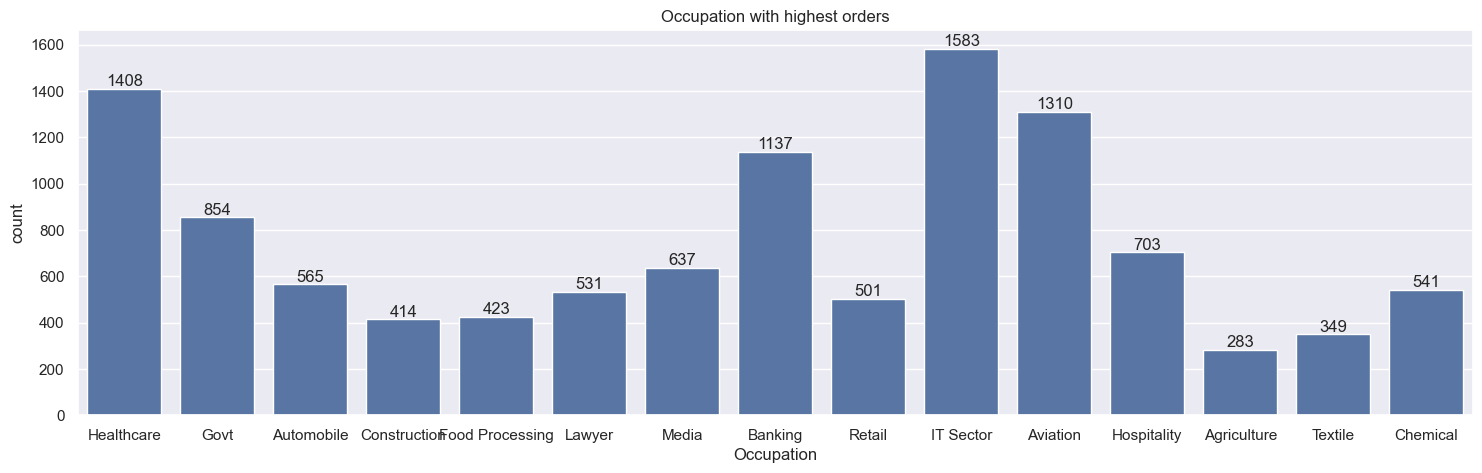

In [62]:


sns.set(rc={'figure.figsize':(18,5)})
ax=sns.countplot(x='Occupation',data=df)
plt.title('Occupation with highest orders')
for bars in ax.containers:
    ax.bar_label(bars)


 # from the above graph it can observed that the highest puchases are done from IT sector ,healthcare and aviation respectively

# Occupation Wise Revenue

Text(0.5, 1.0, 'Occupation wise Revenue ')

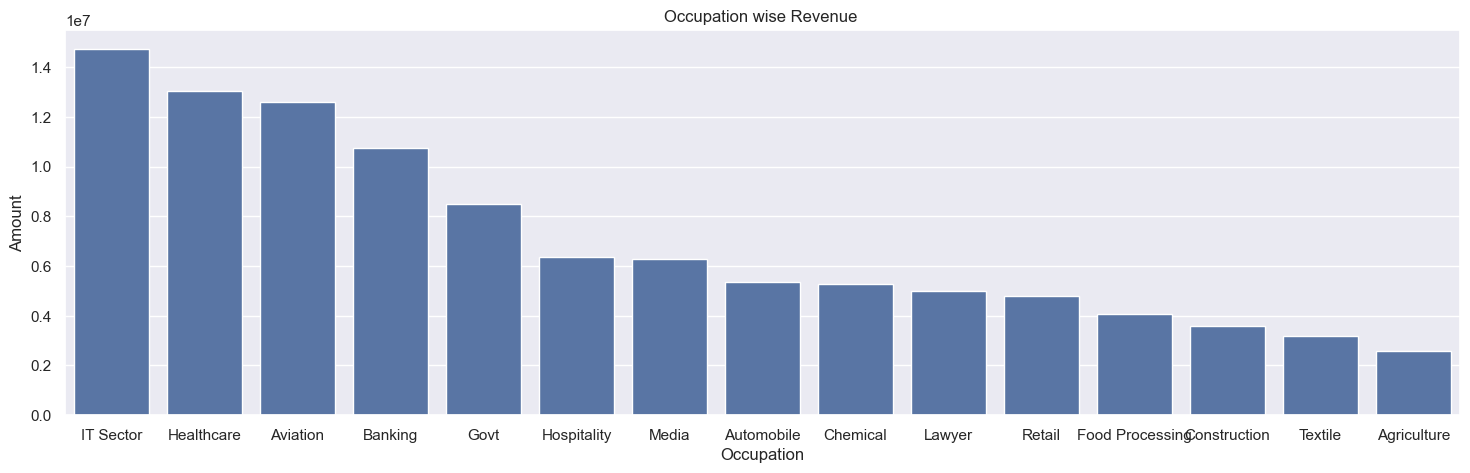

In [59]:

sales_occu=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
sns.set(rc={'figure.figsize':(18,5)})
ax=sns.barplot(x='Occupation',y='Amount',data=sales_occu)
plt.title('Occupation wise Revenue ')

# the revenue is grenerated more from it sector healtcare and aviation

# Product category vs Revenue

Text(0.5, 1.0, 'Product Category  wise Revenue ')

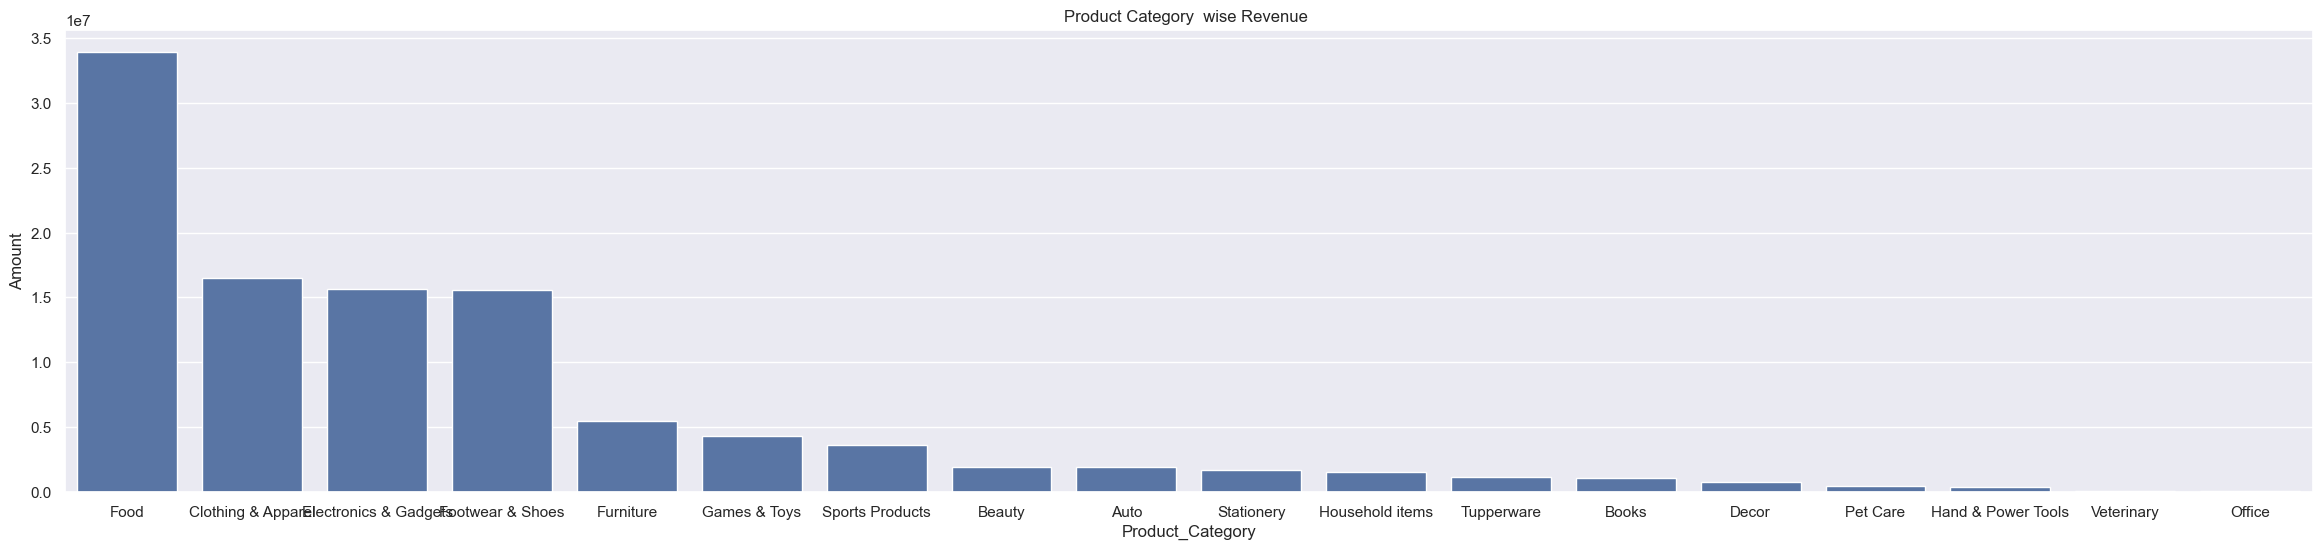

In [74]:

sales_product=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
sns.set(rc={'figure.figsize':(29,6)})
ax=sns.barplot(x='Product_Category',y='Amount',data=sales_product)
plt.title('Product Category  wise Revenue ')


# from the above graph it can observed that most of revenue is generated from food ,clothing and electronics

# Top 10 most sold products 

Text(0.5, 1.0, 'Top 10 most sold Products ')

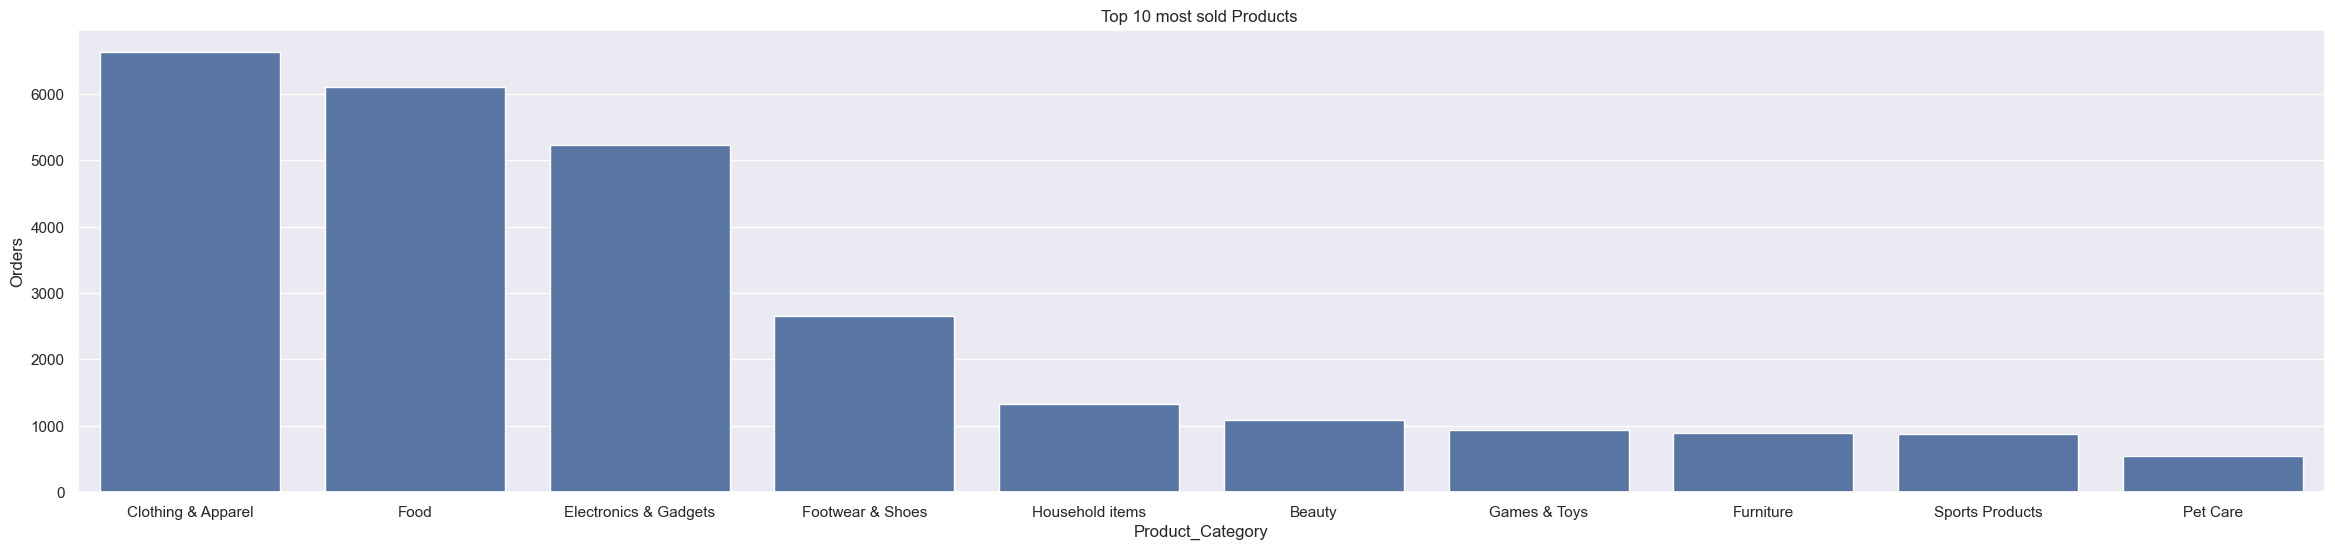

In [75]:


sales_product=df.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values('Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(29,6)})
ax=sns.barplot(x='Product_Category',y='Orders',data=sales_product)
plt.title('Top 10 most sold Products ')

# From the above graph it can seen that highest revenue can be generated from clothing and apparel followed by food 

# Conculsion 

# The EDA reveals that consumer behavior during Diwali is influenced by factors such as age, gender, marital status, occupation, and region. A significant proportion of the revenue is driven by young, married women from metro regions with professional backgrounds. Understanding these trends allows businesses to strategically position their marketing and product offerings. 